In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import pylab

from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, roc_auc_score, confusion_matrix, precision_score, average_precision_score, recall_score, precision_recall_fscore_support
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score, cross_val_predict, GridSearchCV, cross_validate
from category_encoders import TargetEncoder, MEstimateEncoder, LeaveOneOutEncoder, WOEEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import shap
from shap import TreeExplainer
from lime.lime_tabular import LimeTabularExplainer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from catboost import CatBoostClassifier

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
pip install lime

In [ ]:
pip install catboost

In [ ]:
pip install shap

In [ ]:
pip install category_encoders

age AAGE
class of worker ACLSWKR
industry code ADTIND
occupation code ADTOCC
adjusted gross income AGI
education AHGA
wage per hour AHRSPAY
enrolled in edu inst last wk AHSCOL
marital status AMARITL
major industry code AMJIND
major occupation code AMJOCC
mace ARACE
hispanic Origin AREORGN
sex ASEX
member of a labor union AUNMEM
reason for unemployment AUNTYPE
full or part time employment stat AWKSTAT
capital gains CAPGAIN
capital losses CAPLOSS
divdends from stocks DIVVAL
federal income tax liability FEDTAX
tax filer status FILESTAT
region of previous residence GRINREG
state of previous residence GRINST
detailed household and family stat HHDFMX
detailed household summary in household HHDREL
instance weight MARSUPWT
migration code-change in msa MIGMTR1
migration code-change in reg MIGMTR3
migration code-move within reg MIGMTR4
live in this house 1 year ago MIGSAME
migration prev res in sunbelt MIGSUN
num persons worked for employer NOEMP
family members under 18 PARENT
total person earnings PEARNVAL
country of birth father PEFNTVTY
country of birth mother PEMNTVTY
country of birth self PENATVTY
citizenship PRCITSHP
total person income PTOTVAL
own business or self employed SEOTR
taxable income amount TAXINC
fill inc questionnaire for veteran's admin VETQVA
veterans benefits VETYN
weeks worked in year WKSWORK

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [24]:
train = pd.read_csv('./gdrive/MyDrive/ML_final/train.csv')
test = pd.read_csv('./gdrive/MyDrive/ML_final/test.csv')

In [ ]:
#train = pd.read_csv('train.csv')
#test = pd.read_csv('test.csv')

In [9]:
train.head(3)

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,...,PARENT,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,target
0,64,Not in universe,0,0,7th and 8th grade,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,Not in universe,Cuba,Cuba,Cuba,Foreign born- U S citizen by naturalization,0,Not in universe,2,0,- 50000.
1,16,Not in universe,0,0,9th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,- 50000.
2,45,Private,39,19,10th grade,0,Not in universe,Married-civilian spouse present,Personal services except private HH,Sales,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,44,- 50000.


### 1.1. Which metric are you going to use to evaluate the performance of the model and why?

ROC AUC. Its default score for most classification models. 

AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. It tells how much the model is capable of distinguishing between classes. 

This is especially important for our case, because we have unbalanced data. 

### 1.2. Which validation strategy are you going to use and why? 

I will use cross validation with RepeatedStratifiedKFold() and more common cross_val_score with 3 or 5 folds. 

RepeatedStratifiedKFold has the benefit of improving the estimated model performance at the cost of fitting and evaluating many more models.

### 1.3. Explore which features do you have, what is their distribution and connection to the target. Perform feature selection techniques such as PCA, and feature engineering, if necessary. Explain your decisions

In [25]:
data = pd.concat([train, test])

In [11]:
data.dtypes

AAGE         int64
ACLSWKR     object
ADTIND       int64
ADTOCC       int64
AHGA        object
AHRSPAY      int64
AHSCOL      object
AMARITL     object
AMJIND      object
AMJOCC      object
ARACE       object
AREORGN     object
ASEX        object
AUNMEM      object
AUNTYPE     object
AWKSTAT     object
CAPGAIN      int64
CAPLOSS      int64
DIVVAL       int64
FILESTAT    object
GRINREG     object
GRINST      object
HHDFMX      object
HHDREL      object
MIGMTR1     object
MIGMTR3     object
MIGMTR4     object
MIGSAME     object
MIGSUN      object
NOEMP        int64
PARENT      object
PEFNTVTY    object
PEMNTVTY    object
PENATVTY    object
PRCITSHP    object
SEOTR        int64
VETQVA      object
VETYN        int64
WKSWORK      int64
target      object
dtype: object

In [12]:
cat_col = data.columns[data.dtypes == 'object']
num_col = data.columns[data.dtypes != 'object']

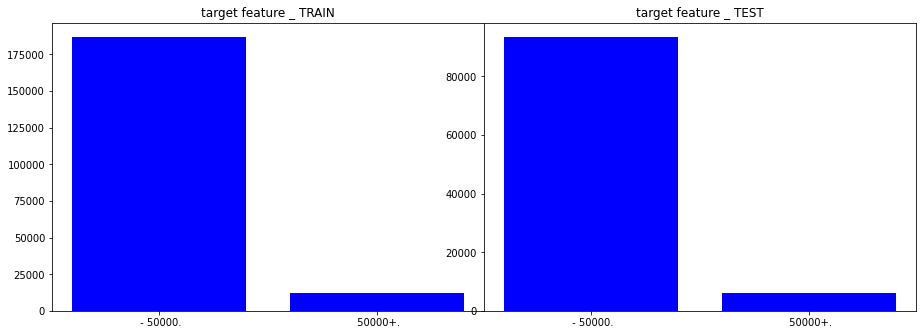

In [13]:
fig = plt.figure()
ax = fig.add_axes([1, 1, 1, 1])
dataset = train['target'].value_counts()
d = pd.DataFrame(train['target'].value_counts())
ax.bar(d.index, dataset, color='b')
ax.title.set_text('target feature _ TRAIN')

ax = fig.add_axes([2, 1, 1, 1])
dataset = test['target'].value_counts()
d = pd.DataFrame(test['target'].value_counts())
ax.bar(d.index, dataset, color='b')
ax.title.set_text('target feature _ TEST')
plt.show()

#### Unbalanced data!!

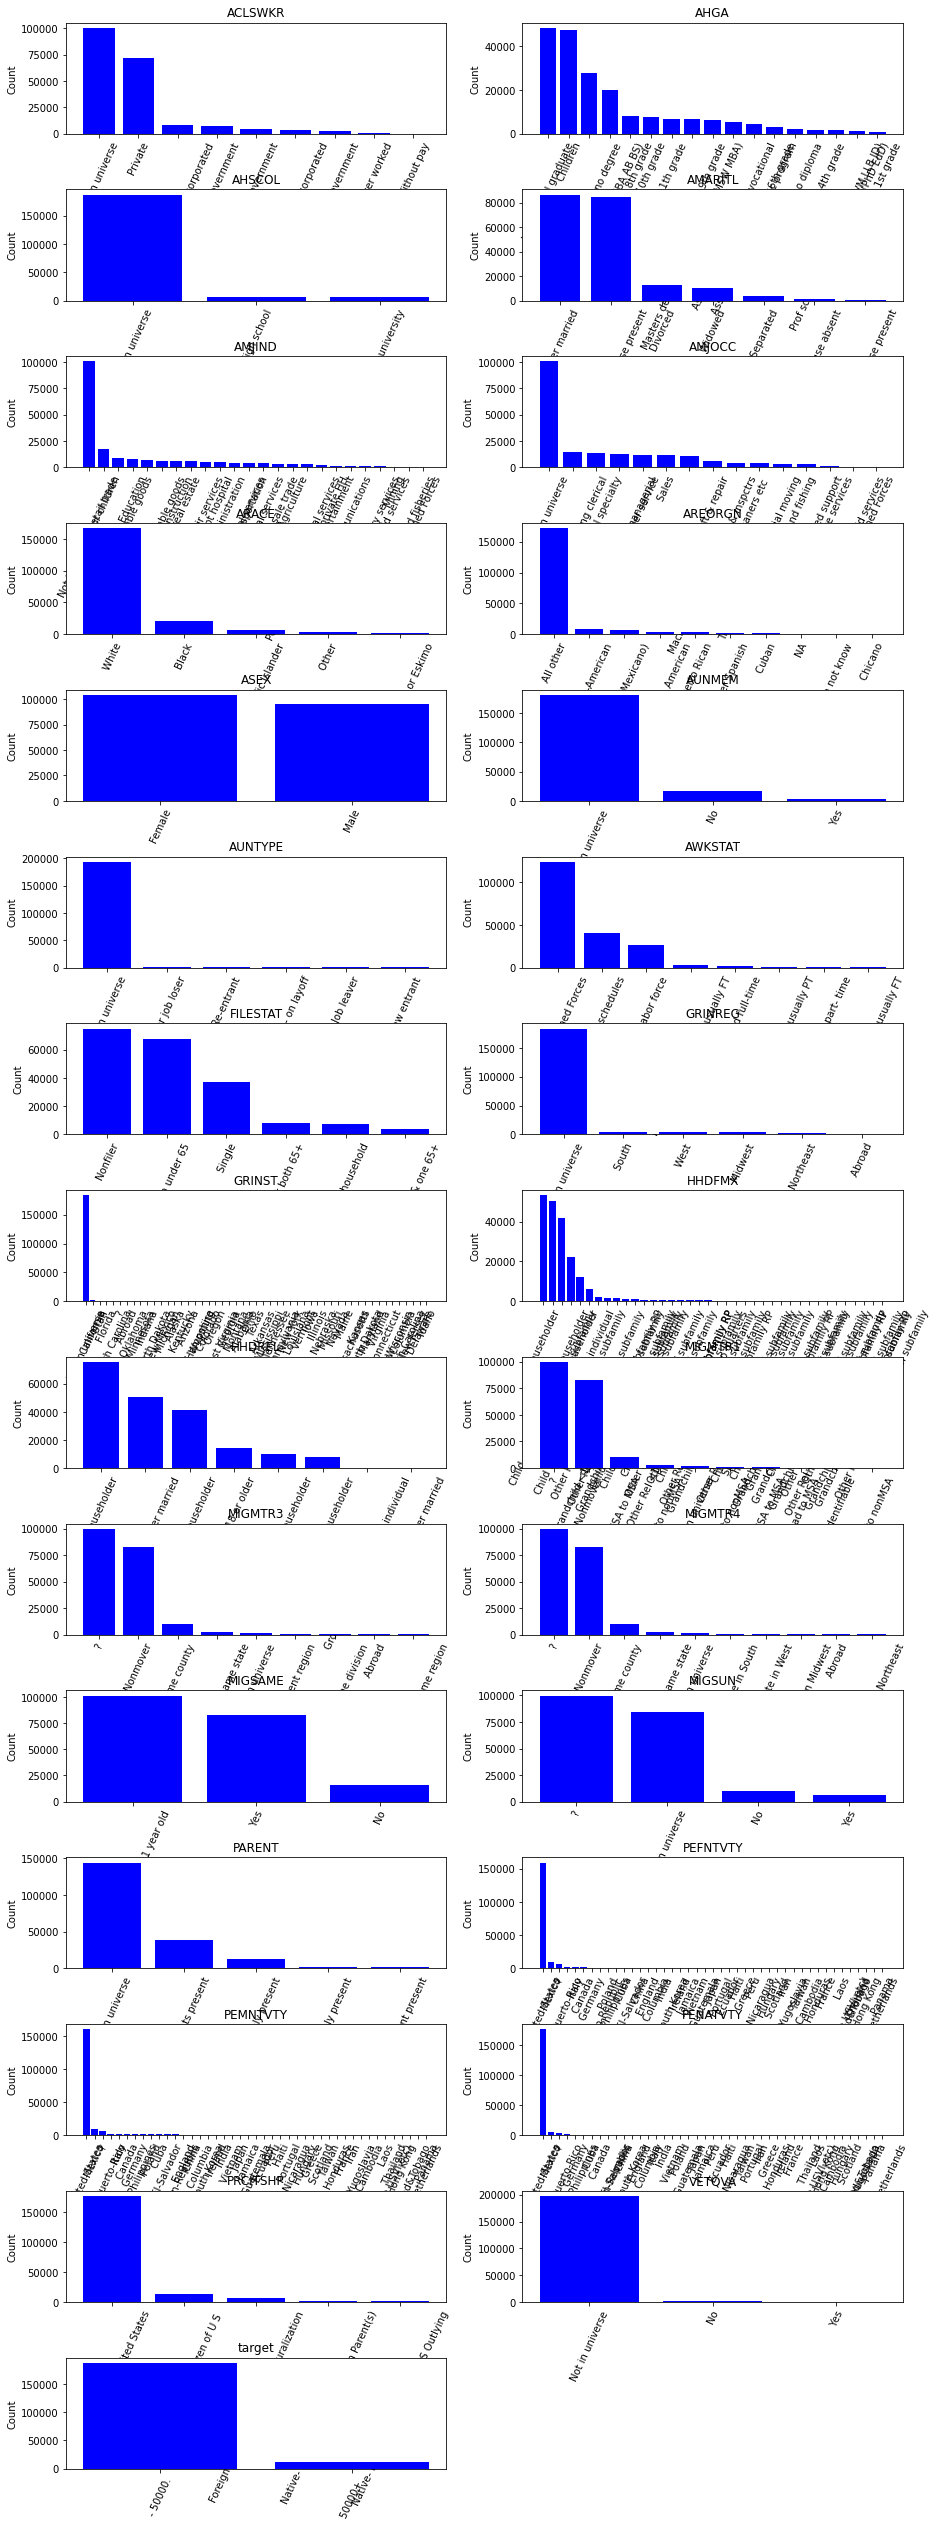

In [14]:
### TRAIN categorical features

plt.subplots(nrows=1, ncols=2, figsize=(15, 45))
plt.subplots_adjust(hspace=.5)

for categ, axs in zip(sorted(cat_col), [[1], [2], [3], [4], [5], [6], [7], [8], [9], [10],
                                        [11], [12], [13], [14], [15], [16], [17], [18], [19], [20],
                                        [21], [22], [23], [24], [25], [26], [27], [28], [29]
                                       ]):
    
    ax = plt.subplot(15, 2, axs[0])
    
    dataset = train[categ].value_counts()
    d = pd.DataFrame(train[categ].value_counts())
    ax.bar(d.index, dataset, color='b')

    ax.title.set_text(categ)
    ax.set_ylabel('Count')
    plt.xticks(rotation=65)

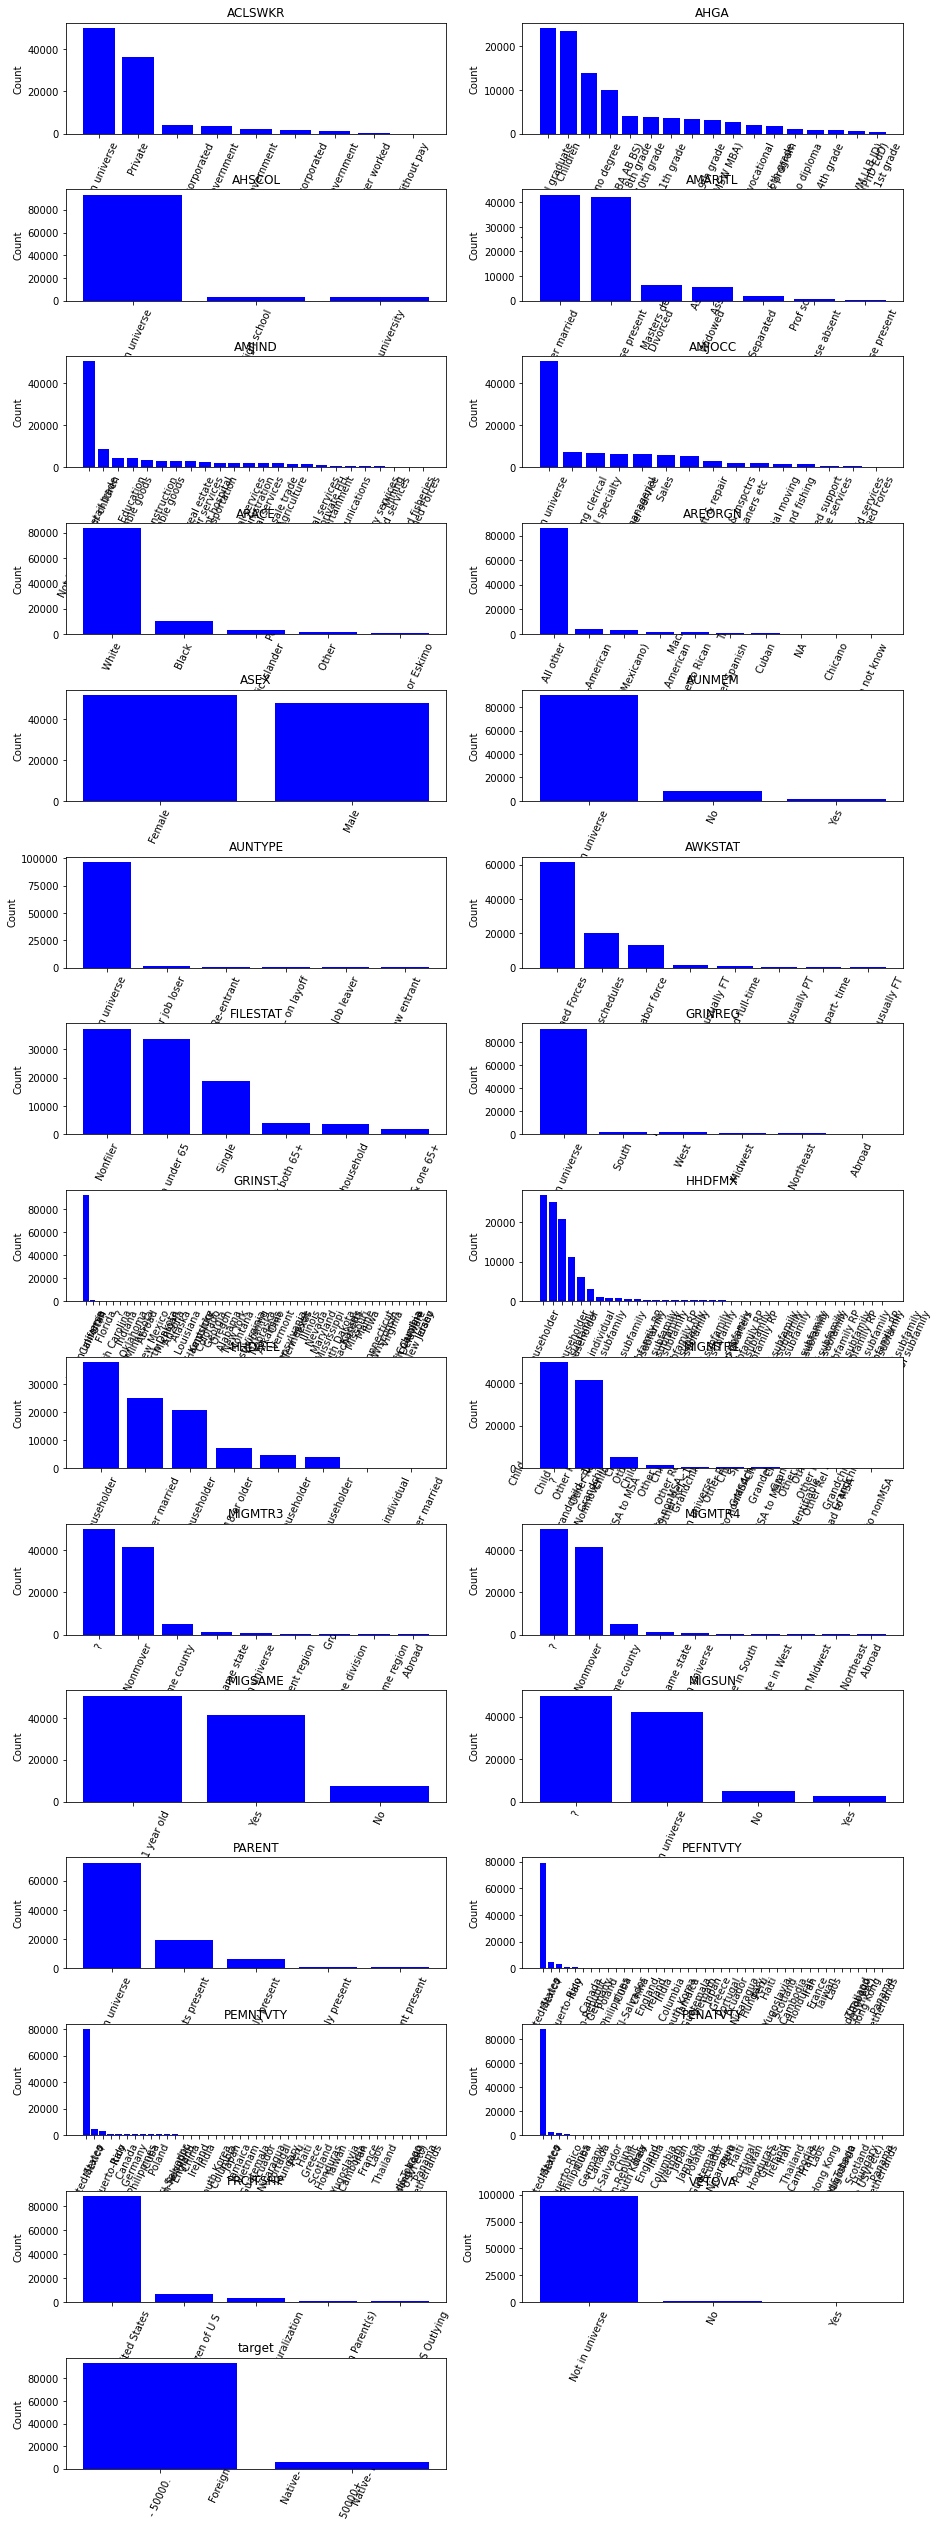

In [15]:
### TEST categorical features

plt.subplots(nrows=1, ncols=2, figsize=(15, 45))
plt.subplots_adjust(hspace=.5)

for categ, axs in zip(sorted(cat_col), [[1], [2], [3], [4], [5], [6], [7], [8], [9], [10],
                                        [11], [12], [13], [14], [15], [16], [17], [18], [19], [20],
                                        [21], [22], [23], [24], [25], [26], [27], [28], [29]
                                       ]):
    
    ax = plt.subplot(15, 2, axs[0])
    
    dataset = test[categ].value_counts()
    d = pd.DataFrame(test[categ].value_counts())
    ax.bar(d.index, dataset, color='b')

    ax.title.set_text(categ)
    ax.set_ylabel('Count')
    plt.xticks(rotation=65)

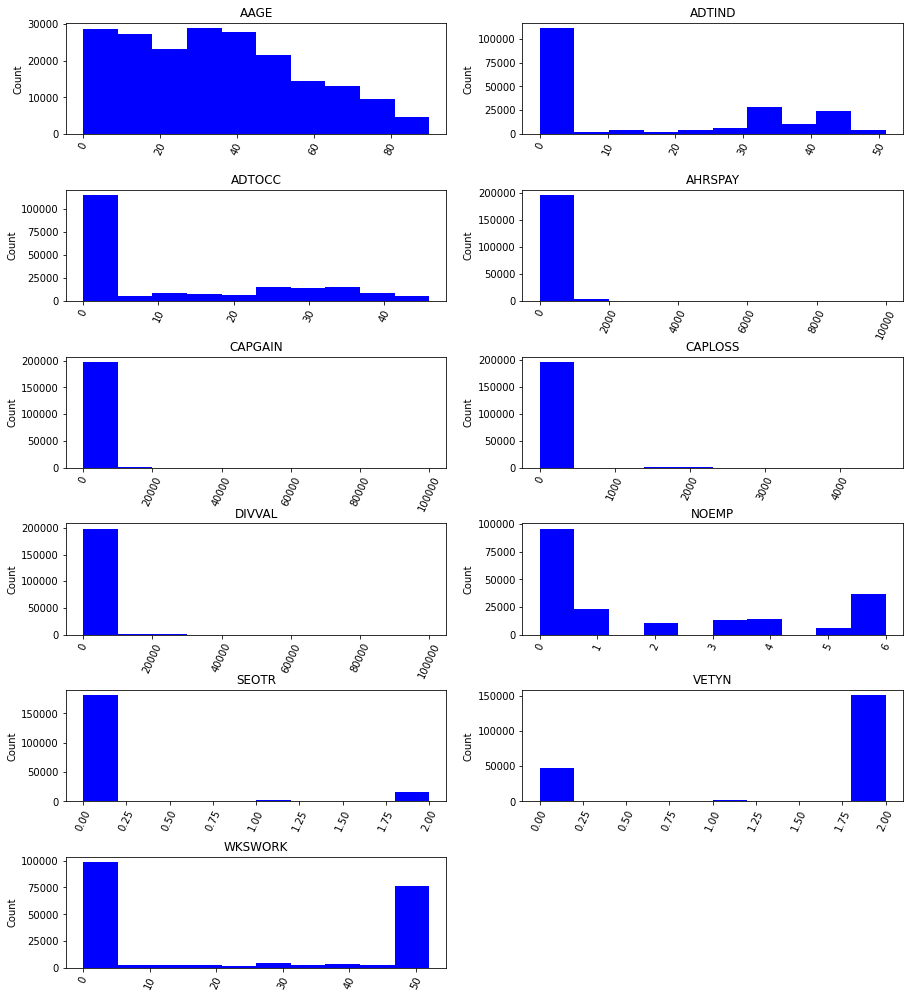

In [16]:
### TRAIN numerical features

plt.subplots(nrows=1, ncols=2, figsize=(15, 45))
plt.subplots_adjust(hspace=.5)

for num, axs in zip(sorted(num_col), [[1], [2], [3], [4], [5], [6], [7], [8], [9], [10],
                                        [11] ]):
    
    ax = plt.subplot(15, 2, axs[0])
    
    ax.hist(train[num], color='b')

    ax.title.set_text(num)
    ax.set_ylabel('Count')
    plt.xticks(rotation=65)

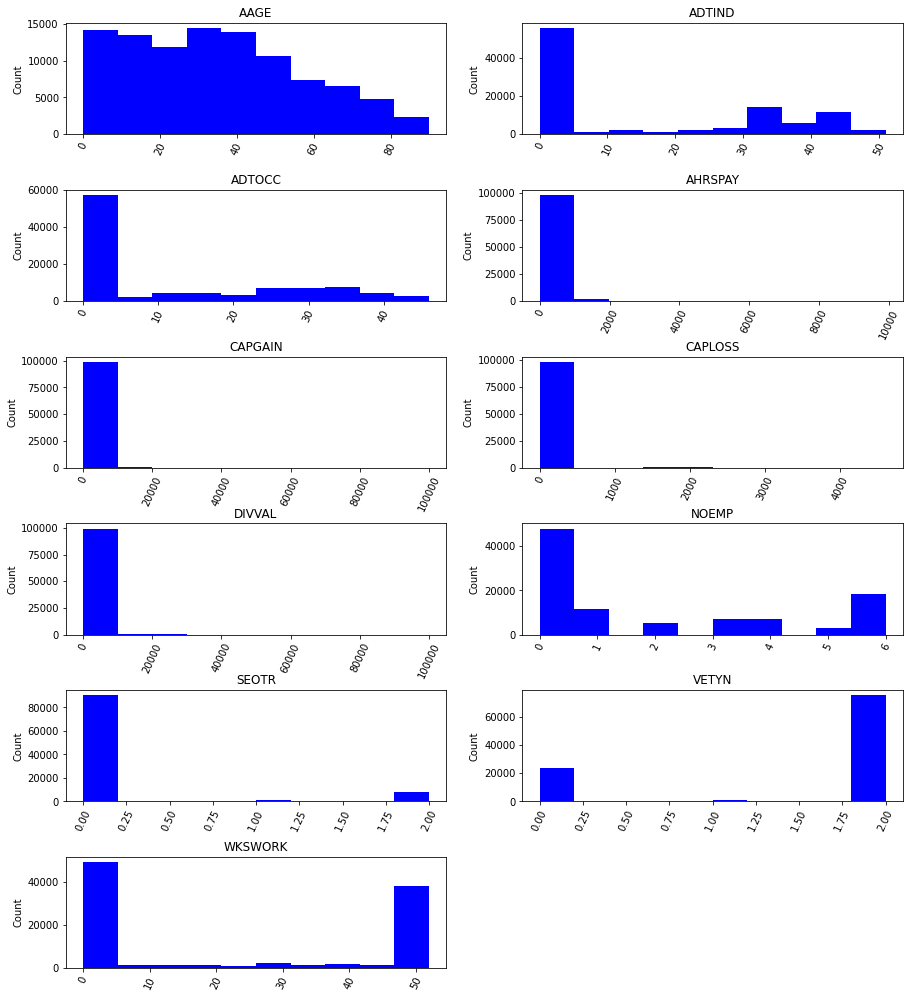

In [17]:
### TEST numerical features

plt.subplots(nrows=1, ncols=2, figsize=(15, 45))
plt.subplots_adjust(hspace=.5)

for num, axs in zip(sorted(num_col), [[1], [2], [3], [4], [5], [6], [7], [8], [9], [10],
                                        [11] ]):
    
    ax = plt.subplot(15, 2, axs[0])
    
    ax.hist(test[num], color='b')

    ax.title.set_text(num)
    ax.set_ylabel('Count')
    plt.xticks(rotation=65)

For none of the features there is a significant difference in the distribution between train and test

In [ ]:
#did not improve model performance

#pca = PCA(n_components=5)
#X_train = pca.fit_transform(X_train)
#X_test = pca.fit_transform(X_test)

### 2.1. Fill missing values (if there are any)

In [18]:
data.isnull().sum()

AAGE        0
ACLSWKR     0
ADTIND      0
ADTOCC      0
AHGA        0
AHRSPAY     0
AHSCOL      0
AMARITL     0
AMJIND      0
AMJOCC      0
ARACE       0
AREORGN     0
ASEX        0
AUNMEM      0
AUNTYPE     0
AWKSTAT     0
CAPGAIN     0
CAPLOSS     0
DIVVAL      0
FILESTAT    0
GRINREG     0
GRINST      0
HHDFMX      0
HHDREL      0
MIGMTR1     0
MIGMTR3     0
MIGMTR4     0
MIGSAME     0
MIGSUN      0
NOEMP       0
PARENT      0
PEFNTVTY    0
PEMNTVTY    0
PENATVTY    0
PRCITSHP    0
SEOTR       0
VETQVA      0
VETYN       0
WKSWORK     0
target      0
dtype: int64

### 2.2. Properly encode categorical features. Explain your choice of methods of categorical feature encoding

I change 'education' feature 'AHGA' to ordinal :

In [26]:
train['AHGA'].replace([ ' Children',  ' Less than 1st grade',  ' 1st 2nd 3rd or 4th grade',  
                       ' 5th or 6th grade', ' 7th and 8th grade',  ' 9th grade', ' 10th grade', 
                       ' 11th grade',  ' 12th grade no diploma', ' High school graduate', 
                       ' Some college but no degree',  ' Associates degree-occup /vocational',  
                       ' Associates degree-academic program',  ' Bachelors degree(BA AB BS)',  
                       ' Masters degree(MA MS MEng MEd MSW MBA)', ' Prof school degree (MD DDS DVM LLB JD)',  
                       ' Doctorate degree(PhD EdD)'
],
                                 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 14, 15],inplace=True) 

In [27]:
test['AHGA'].replace([ ' Children',  ' Less than 1st grade',  ' 1st 2nd 3rd or 4th grade',  
                       ' 5th or 6th grade', ' 7th and 8th grade',  ' 9th grade', ' 10th grade', 
                       ' 11th grade',  ' 12th grade no diploma', ' High school graduate', 
                       ' Some college but no degree',  ' Associates degree-occup /vocational',  
                       ' Associates degree-academic program',  ' Bachelors degree(BA AB BS)',  
                       ' Masters degree(MA MS MEng MEd MSW MBA)', ' Prof school degree (MD DDS DVM LLB JD)',  
                       ' Doctorate degree(PhD EdD)'
],
                                 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 14, 15],inplace=True) 

I change binary categorical features to numerical :

In [28]:
train['target'].replace([' - 50000.', ' 50000+.'], [0, 1],inplace=True) 
train['ASEX'].replace([' Female', ' Male'], [0, 1],inplace=True) 
test['target'].replace([' - 50000.', ' 50000+.'], [0, 1],inplace=True) 
test['ASEX'].replace([' Female', ' Male'], [0, 1],inplace=True) 

I will encode the rest categorical features using WoE encoding, since this method is intended for binary classification tasks:

In [29]:
cat_col = train.columns[train.dtypes == 'object']
num_col = train.columns[train.dtypes != 'object']
encoder = WOEEncoder()
train_0 = train[cat_col]

In [30]:
for cat in cat_col:
    train[cat] = encoder.fit_transform(train[cat], train['target'])

We cannot apply a WoE encoder for test data because in a real task we do not have target feature in test data. But we can use the received above values in the train data for replacement in test data. 

In [31]:
for cat in cat_col:
    d = dict()
    for _ in range (len(train_0[cat])):
        d[train_0[cat][_]] = train[cat][_]
    test[cat] = test[cat].apply(lambda x: d[x])

In [32]:
y_train = train.target
y_test = test.target
X_train = train.drop(['target'], axis=1)
X_test = test.drop(['target'], axis=1)

### 2.3. Cluster observations and add cluster number as one of the features. Make sure that the clustering method has a good quality. 

Not valid for classification task. 

### 3.1. Apply different techniques which can help to work with imbalanced data. You are supposed to try at least 2 techniques (in the end, you don't have to include them into your final pipeline - but you should explain why)

In [ ]:
#not the winner

#oversample = SMOTE()
#undersample = RandomUnderSampler()
#steps = [('o', oversample), ('u', undersample)]
#pipeline = Pipeline(steps=steps) 
#X_train, y_train = pipeline.fit_resample(X_train, y_train)

In [ ]:
#not the winner

#adasyn = ADASYN(sampling_strategy=0.8, n_neighbors=5, random_state=13)
#X_train, y_train = adasyn.fit_resample(X_train, y_train)

The best performance was shown by the parameter 'scale_pos_weight' built into the XGBClassifier model. 

A typical value to consider: sum(negative instances) / sum(positive instances). 

In [33]:
scale_pos_weight = y_train.value_counts()[1] / y_train.value_counts()[0]
scale_pos_weight

0.06616401536809144

### 3.2.-3.3. Train different machine learning models, including the advanced boosting algorithms studied during the course. Carefully tune hyperparameters of the algorithms. You are supposed to compare at least 3 models
### Perform blending or stacking of the trained machine learning algorithms. Carefully tune the weights of the ensemble

In [34]:
cat_col = train.columns[train.dtypes == 'object']
num_col = train.columns[train.dtypes != 'object']
num_col = list(num_col)
num_col.remove('target')

In [35]:
num_pipe = make_pipeline(StandardScaler())

categ_pipe = make_pipeline(OneHotEncoder())
                         
column_transformer = ColumnTransformer([
 ('all_num', num_pipe, num_col),
 ('all_cat', categ_pipe, cat_col)],
remainder='passthrough'
)

In [36]:
pipe_lr = Pipeline([
    ('transformer', column_transformer),
    ('estimator', LogisticRegression(class_weight='balanced'))
])

pipe_kn = Pipeline([
    ('transformer', column_transformer),
    ('estimator', KNeighborsClassifier())
])

pipe_dt = Pipeline([
    ('transformer', column_transformer),
    ('estimator', DecisionTreeClassifier(class_weight='balanced'))
])

pipe_svm = Pipeline([
    ('transformer', column_transformer),
    ('estimator', svm.SVC(class_weight='balanced'))
])

pipe_nb = Pipeline([
    ('transformer', column_transformer),
    ('estimator', GaussianNB())
])

pipe_gb = Pipeline([
    ('transformer', column_transformer),
    ('estimator', GradientBoostingClassifier())
])

pipe_rf = Pipeline([
    ('transformer', column_transformer),
    ('estimator', RandomForestClassifier(class_weight='balanced'))
])

pipe_xgb = Pipeline([
    ('transformer', column_transformer),
    ('estimator', xgb.XGBClassifier(scale_pos_weight=scale_pos_weight))   
])

pipes = {'Logistic Regression': pipe_lr, 'Decision Tree': pipe_dt, 'Naive Bayes': pipe_nb, 
         'Gradient Boosting': pipe_gb, 'Random Forest': pipe_rf, 'XGBoost': pipe_xgb}

In [37]:
for name, pipe in pipes.items():
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipe, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
    print(name, scores.mean())

Logistic Regression 0.9403379534924159
Decision Tree 0.7060935572758767
Naive Bayes 0.8942030654140843
Gradient Boosting 0.9477112995124541
Random Forest 0.9388294821756535


A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.


XGBoost 0.9464147829562644


## Logistic Regression

In [ ]:
param_grid = {
    'estimator__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'estimator__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

grid_lr = GridSearchCV(pipe_lr, param_grid=param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
grid_lr.fit(X_train, y_train)

In [ ]:
grid_lr.best_params_

In [ ]:
final_lr = Pipeline([
    ('transformer', column_transformer),
    ('estimator', LogisticRegression(class_weight='balanced', penalty='l1', solver='saga'))
])
final_lr.fit(X_train, y_train)

In [40]:
lr = LogisticRegression(class_weight='balanced', penalty='l1', solver='saga')
lr.fit(X_train, y_train)

The max_iter was reached which means the coef_ did not converge


LogisticRegression(class_weight='balanced', penalty='l1', solver='saga')

## XGBoost

In [ ]:
param_grid = {
    'estimator__min_child_weight': [2],         #[1, 2, 3]
    'estimator__learning_rate': [0.2],    #[0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    'estimator__max_depth': [4],          #[3, 4, 5, 6, 7]
    'estimator__n_estimators': [100],     #[10, 100, 200, 300, 400, 500]
    'estimator__scale_pos_weight': [0.066]
}

grid_xgb = GridSearchCV(pipe_xgb, param_grid=param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
grid_xgb.fit(X_train, y_train)


In [ ]:
grid_xgb.best_params_

{'estimator__learning_rate': 0.2,
 'estimator__max_depth': 4,
 'estimator__min_child_weight': 2,
 'estimator__n_estimators': 100,
 'estimator__scale_pos_weight': 0.066}

In [ ]:
final_xgb = Pipeline([
    ('transformer', column_transformer),
    ('estimator', xgb.XGBClassifier(scale_pos_weight=scale_pos_weight, learning_rate=0.2, max_depth=4, n_estimators=100, min_child_weight=2))
])
final_xgb.fit(X_train, y_train)

## CatBoost

In [ ]:
cb = CatBoostClassifier(scale_pos_weight=scale_pos_weight)
cb.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=50)

In [ ]:
parameters = {'depth' : [10], #[3, 4, 5, 6, 7, 10],
              'learning_rate' : [0.02] #[0.001, 0.0015, 0.002, 0.005, 0.007, 0.1, 0.2],
              'iterations'    : [500], #[50, 200, 500, 1000]
             }
grid_cb = GridSearchCV(estimator=cb, param_grid=parameters, cv = 3, scoring='roc_auc', n_jobs=-1)
grid_cb.fit(X_train, y_train)

In [ ]:
grid_cb.best_params_

In [ ]:
final_cb = Pipeline([
    ('transformer', column_transformer),
    ('estimator', CatBoostClassifier(scale_pos_weight=scale_pos_weight, depth=10, iterations=500, learning_rate=0.002))
])
final_cb.fit(X_train, y_train)

## 4.1. Estimate the quality of the models and their ensemble on the test set. Describe the results. Which model is the best?

In [41]:
y_pred_lr = final_lr.predict(X_test)

print('Logistic Regression results!')
print('roc_auc', roc_auc_score(y_pred_lr, y_test))
print('-----------------------')
print('f1 macro',f1_score(y_pred_lr, y_test, average='macro'))
print('f1 micro',f1_score(y_pred_lr, y_test, average='micro'))
print('confusion matrix', confusion_matrix(y_pred_lr, y_test))

Logistic Regression results!
roc_auc 0.6302586260331723
-----------------------
f1 macro 0.6611446933828211
f1 micro 0.8423447805777751
confusion matrix [[78493   645]
 [15083  5541]]


In [43]:
y_pred_xgb = final_xgb.predict(X_test)

print('XGBBoost results!')
print('roc_auc', roc_auc_score(y_pred_xgb, y_test))
print('-----------------------')
print('f1 macro',f1_score(y_pred_xgb, y_test, average='macro'))
print('f1 micro',f1_score(y_pred_xgb, y_test, average='micro'))
print('confusion matrix', confusion_matrix(y_pred_xgb, y_test))

XGBBoost results!
roc_auc 0.9572991632282066
-----------------------
f1 macro 0.5882259021785254
f1 micro 0.9448788115715403
confusion matrix [[93554  5477]
 [   22   709]]


In [46]:
y_pred = final_cb.predict(X_test)

print('CatBoost results!')
print('roc_auc', roc_auc_score(y_pred, y_test))
print('-----------------------')
print('f1 macro',f1_score(y_pred, y_test, average='macro'))
print('f1 micro',f1_score(y_pred, y_test, average='micro'))
print('confusion matrix', confusion_matrix(y_pred, y_test))

CatBoost results!
roc_auc 0.9690573339081093
-----------------------
f1 macro 0.48613176910372546
f1 micro 0.9381227321024037
confusion matrix [[93576  6173]
 [    0    13]]


Our winner is CatBoost model!

## 4.2. Interpret the best single model and the ensemble. Use at least 2 model interpretation techniques. Explain, why your models have good quality (or bad quality)

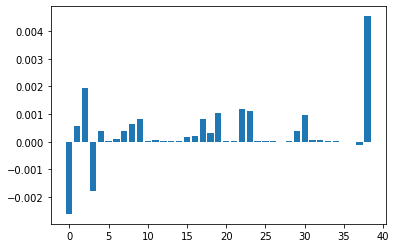

In [47]:
# Logistic Regression 

importance = lr.coef_[0]

plt.bar([X for X in range(len(importance))], importance)
plt.show()

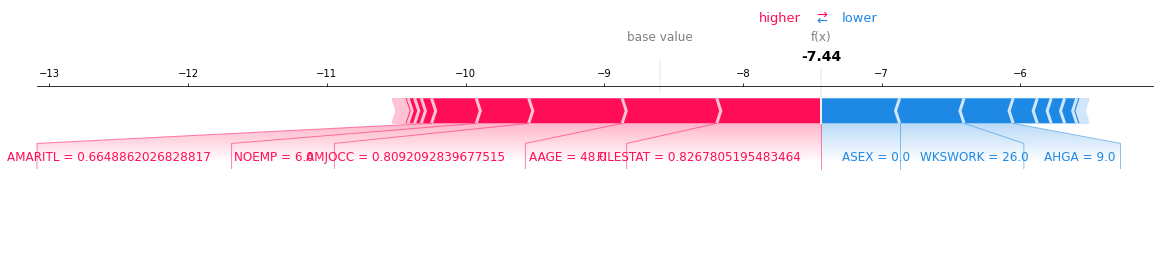

In [48]:
# CatBoost 
 
explainerModel = TreeExplainer(cb)
shap_values_Model = explainerModel.shap_values(X_test)
p = shap.force_plot(explainerModel.expected_value, shap_values=shap_values_Model[-1, :], features=X_test.iloc[-1, :], 
                    matplotlib = True)

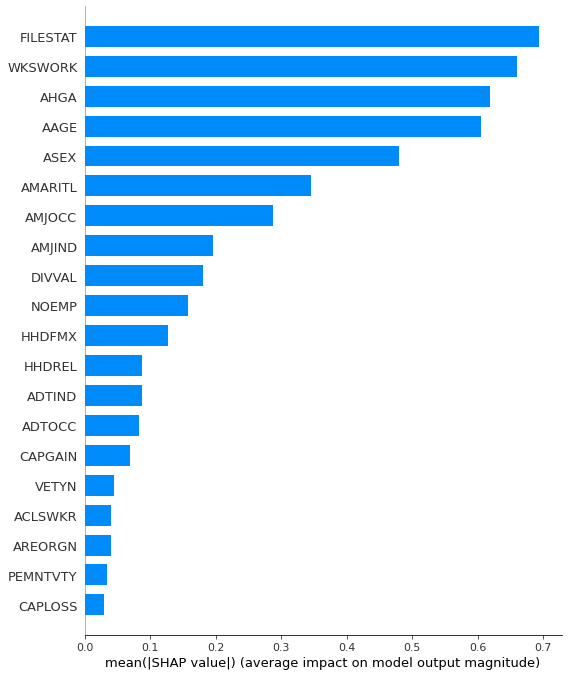

In [49]:
shap.summary_plot(shap_values=shap_values_Model, plot_type='bar', features=X_test.columns)

So, the following features make the greatest contribution to the prediction of the model: tax filer status (FILESTAT), weeks worked in a year (WKSWORK), education (AHGA), age (AAGE), sex (ASEX).
This list is pretty predictable, as for me.

## 4.3. Summarize your results and write a conclusion. What have you found in the data, which techniques did you use? Which methods and models worked best in your task? Can you explain in simple words why should we trust your final model?

- 39 features
- Several encoding techniques have been used, including numeric ordinal and binary features and WoE encoding
- Unbalanced data. The final model uses the built-in “scale_pos_weight”.
- Cross Validation: RepeatedStratifiedKFold
- Best model: CatBoost
- Selection of parameters with GridSearchCV 
- Features interpretation with TreeExplainer
- Final result on test data: roc_auc = 0.969
- The result is high, the confusion matrix shows that there are almost no errors: 13 / 99749  (0.013%)

I am satisfied with the result. 